In [6]:
import pandas as pd
import matplotlib as plt
import numpy as np

## Function for Reading Files

In [10]:
def get_data(year):
    new_filename = f'{year}.txt'
    data: pd.DataFrame = pd.read_csv(f'datasets/babynames/yob{new_filename}', names = ['Name', 'Sex', 'BirthCount'])

    data['Year'] = year
    return data

## Joining Files Together

In [12]:
min_year = 1880
max_year = 2010

names = pd.DataFrame([])

for year in range(min_year, max_year):
    frame = get_data(year)
    names = pd.concat([names, frame], ignore_index = True)

In [13]:
names[names['Name'] == 'Mary']

,Name,Sex,BirthCount,Year
0,Mary,F,7065,1880
1273,Mary,M,27,1880
2000,Mary,F,6919,1881
3238,Mary,M,29,1881
3935,Mary,F,8149,1882
...,...,...,...,...
1546240,Mary,M,10,2006
1552547,Mary,F,3665,2007
1581614,Mary,M,9,2007
1587434,Mary,F,3478,2008


## Grouping Data By Feature

In [15]:
group_s = names.groupby('Sex', as_index = False)

In [16]:
print(f'Dataset Contains {len(group_s.size())} unique Sex groups: \n\n', group_s.size())

Dataset Contains 2 unique Sex groups: 

   Sex    size
0   F  984287
1   M  672659


## Plotting Births Over Time

In [17]:
total_births = names.pivot_table('BirthCount', index='Year', columns='Sex', aggfunc=sum)

/var/folders/x7/fvp1tlcs6230d7t28xnbbqm80000gp/T/ipykernel_40591/1610796278.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('BirthCount', index='Year', columns='Sex', aggfunc=sum)


<Axes: title={'center': 'Total Births by Sex and Year'}, xlabel='Year'>

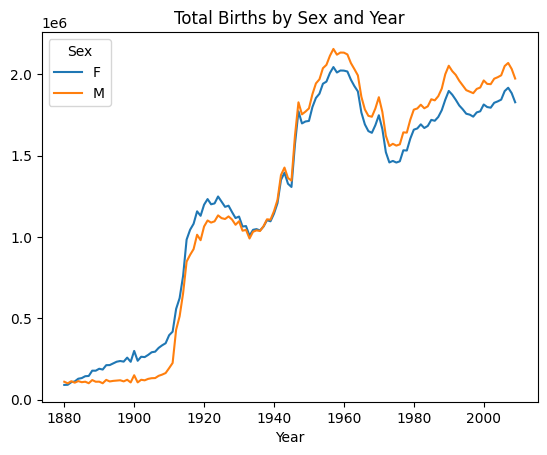

In [18]:
total_births.plot(title = 'Total Births by Sex and Year')

## Most Common Names

In [19]:
def add_proportion(group):
    group['Proportion'] = group['BirthCount'] / group['BirthCount'].sum()
    return group

In [20]:
g = names.groupby(['Year', 'Sex'], group_keys = False)
g.size()

Year  Sex
1880  F        942
      M       1058
1881  F        938
      M        997
1882  F       1028
             ...  
2007  M      14363
2008  F      20416
      M      14590
2009  F      20123
      M      14479
Length: 260, dtype: int64

In [21]:
df = g.apply(add_proportion)
df.iloc[df[df['Sex'] == 'M']['Proportion'].idxmax()]

/var/folders/x7/fvp1tlcs6230d7t28xnbbqm80000gp/T/ipykernel_40591/1343550194.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = g.apply(add_proportion)


Name              John
Sex                  M
BirthCount        9655
Year              1880
Proportion    0.087381
Name: 942, dtype: object

## Sorting Values

In [22]:
def get_top(group, results = 1000):
    if results > 0 and results <= len(group):
        return group.sort_values('BirthCount', ascending = False)[:results]

In [23]:
grouped = names.groupby(['Year', 'Sex'])
top = grouped.apply(get_top)

/var/folders/x7/fvp1tlcs6230d7t28xnbbqm80000gp/T/ipykernel_40591/1964732431.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top = grouped.apply(get_top)


In [24]:
top

Name Sex  BirthCount  Year
Year Sex                                       
1880 M   942         John   M        9655  1880
         943      William   M        9533  1880
         944        James   M        5927  1880
         945      Charles   M        5348  1880
         946       George   M        5126  1880
...                   ...  ..         ...   ...
2009 M   1643462    Stone   M         197  2009
         1643463   Trevin   M         197  2009
         1643464  Tyshawn   M         197  2009
         1643468  Ronaldo   M         196  2009
         1643467  Mustafa   M         196  2009

[257000 rows x 4 columns]

In [26]:
# drop the year grouping
top = top.reset_index(drop=True)
top

,Name,Sex,BirthCount,Year
0,John,M,9655,1880
1,William,M,9533,1880
2,James,M,5927,1880
3,Charles,M,5348,1880
4,George,M,5126,1880
...,...,...,...,...
256995,Stone,M,197,2009
256996,Trevin,M,197,2009
256997,Tyshawn,M,197,2009
256998,Ronaldo,M,196,2009


## Shuffle and Sampling

In [27]:
shuffle_index = np.random.permutation(top.index)
shuffle_index

array([111969, 127812,    891, ..., 112399, 201383, 148458])

In [30]:
shuffled_df = top.reindex(shuffle_index)
sample = shuffled_df.head(1000)

In [31]:
sample

,Name,Sex,BirthCount,Year
111969,Marylee,F,52,1937
127812,Joellen,F,87,1945
891,Ethel,M,6,1880
67854,Edyth,F,59,1915
248699,Kareem,M,293,2005
...,...,...,...,...
237755,Greta,F,301,2000
226902,Kegan,M,146,1994
144913,Dennie,M,62,1953
63868,Myrle,F,37,1913


In [32]:
males = sample[sample['Sex'] == 'M']
males

,Name,Sex,BirthCount,Year
891,Ethel,M,6,1880
248699,Kareem,M,293,2005
26979,Isidor,M,6,1894
16224,Ervin,M,52,1889
240948,Brant,M,162,2001
...,...,...,...,...
114655,Doris,M,83,1938
38606,Ole,M,17,1900
20507,Verne,M,13,1891
226902,Kegan,M,146,1994


In [33]:
females = sample[sample['Sex'] == 'F']
females

,Name,Sex,BirthCount,Year
111969,Marylee,F,52,1937
127812,Joellen,F,87,1945
67854,Edyth,F,59,1915
167335,Billie,F,724,1965
55124,Della,F,568,1909
...,...,...,...,...
143241,Tina,F,1098,1953
27022,Ida,F,2170,1895
237755,Greta,F,301,2000
63868,Myrle,F,37,1913


In [34]:
total_births = top.pivot_table('BirthCount', index='Year', columns='Name', aggfunc=sum)

total_births

/var/folders/x7/fvp1tlcs6230d7t28xnbbqm80000gp/T/ipykernel_40591/1489047510.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top.pivot_table('BirthCount', index='Year', columns='Name', aggfunc=sum)


Name,Aaden,Aaliyah,Aarav,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,80.0,NaN,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,98.0,NaN,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0
1885,NaN,NaN,NaN,88.0,6.0,NaN,NaN,NaN,88.0,NaN,...,NaN,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,NaN,3452.0,NaN,7796.0,NaN,287.0,NaN,451.0,445.0,600.0,...,NaN,NaN,4953.0,2266.0,502.0,NaN,NaN,NaN,NaN,NaN
2006,NaN,3737.0,NaN,8279.0,NaN,297.0,NaN,404.0,440.0,630.0,...,NaN,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,313.0,NaN,349.0,468.0,651.0,...,NaN,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN


array([<Axes: xlabel='Year', ylabel='BirthCount'>,
       <Axes: xlabel='Year', ylabel='BirthCount'>,
       <Axes: xlabel='Year', ylabel='BirthCount'>,
       <Axes: xlabel='Year', ylabel='BirthCount'>], dtype=object)

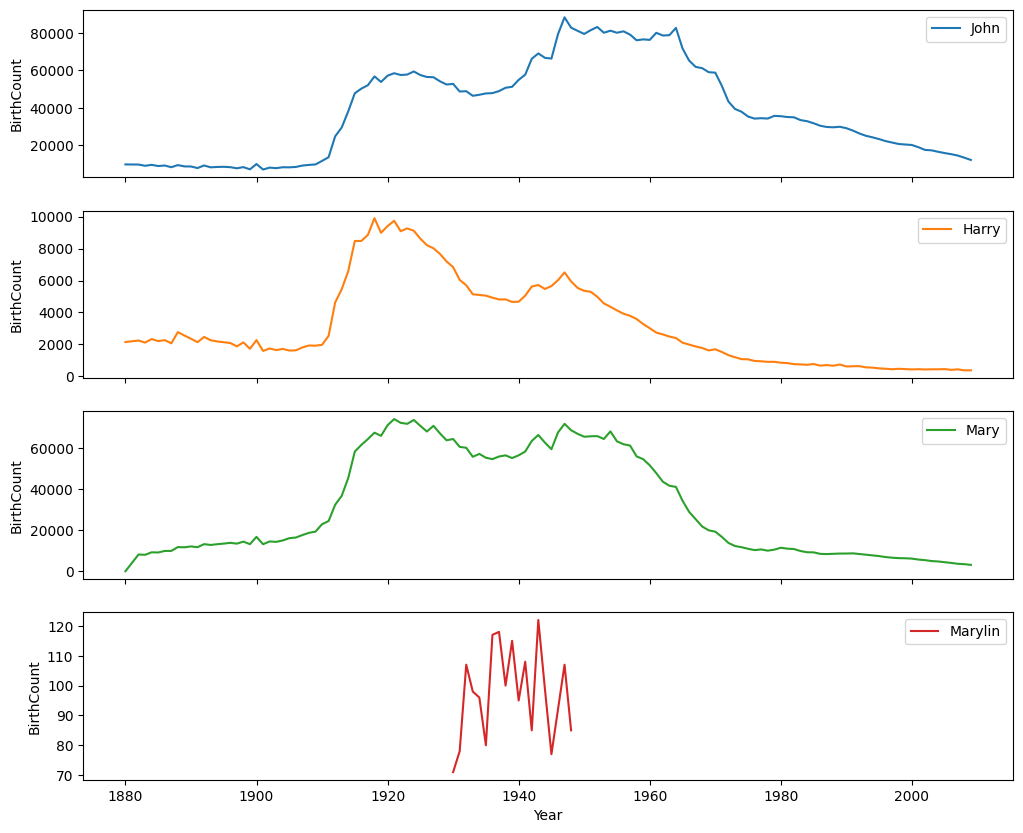

In [35]:
subset = total_births[['John', 'Harry', 'Mary', 'Marylin']]
subset.plot(subplots = True, figsize = (12,10), ylabel='BirthCount', xlabel='Year')

## Unisex Names Over Time

In [36]:
all_names = pd.Series(top['Name'].unique())
all_names

0          John
1       William
2         James
3       Charles
4        George
         ...   
6768      Juelz
6769     Jaycob
6770      Kalel
6771     Maddux
6772     Zavion
Length: 6773, dtype: object

In [37]:
lesley_like = all_names[all_names.str.contains('Lesl')]
lesley_like

166     Leslie
1965    Lesley
4214    Leslee
4683     Lesli
6059     Lesly
dtype: object

In [38]:
filtered = top[top["Name"].isin(lesley_like)]
filtered

,Name,Sex,BirthCount,Year
166,Leslie,M,79,1880
1635,Leslie,F,9,1882
2118,Leslie,M,122,1882
2846,Lesley,M,6,1882
3764,Leslie,F,7,1883
...,...,...,...,...
251816,Lesley,F,351,2007
253146,Leslie,F,2323,2008
253450,Lesly,F,699,2008
255159,Leslie,F,1975,2009


In [39]:
filtered.groupby('Name')['BirthCount'].sum()

Name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    368760
Lesly       9565
Name: BirthCount, dtype: int64

In [42]:
table = filtered.pivot_table('BirthCount', index = 'Year', columns = 'Sex', aggfunc = 'sum')

table

Sex,F,M
Year,,
1880,NaN,79.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
1885,10.0,122.0
...,...,...
2005,4284.0,NaN
2006,4166.0,NaN
2007,3805.0,NaN


In [43]:
table = table.div(table.sum(axis='columns'), axis='index')

table

Sex,F,M
Year,,
1880,NaN,1.000000
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
...,...,...
2005,1.000000,NaN
2006,1.000000,NaN
2007,1.000000,NaN


<Axes: xlabel='Year'>

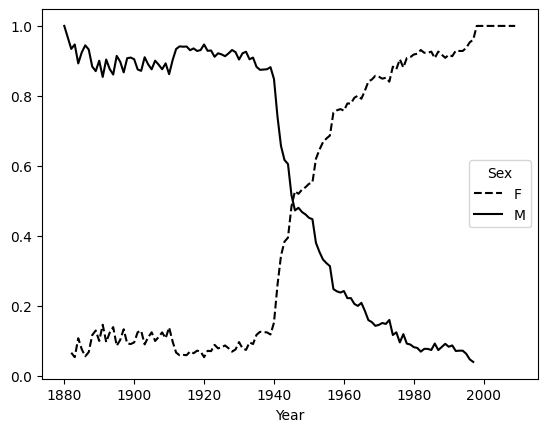

In [44]:
table.plot(style={'M': 'k-', 'F': 'k--'})